In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [3]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [4]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


# Overall distanace travelled for each ride 

In [5]:
# Total distance for each ride
TDrr_2016 = rr_2016['distance'].sum()
TDtt_2016 = tt_2016['distance'].sum()
TDrr_2019 = rr_2019['distance'].sum()
TDtt_2019 = tt_2019['distance'].sum()

print("Overall distance for rr_2016: ", TDrr_2016.round(),"km")
print("Overall distance for tt_2016: ", TDtt_2016.round(),"km")
print("Overall distance for rr_2019: ", TDrr_2019.round(),"km")
print("Overall distance for tt_2019: ", TDtt_2019.round(),"km")

Overall distance for rr_2016:  49.0 km
Overall distance for tt_2016:  25.0 km
Overall distance for rr_2019:  52.0 km
Overall distance for tt_2019:  24.0 km


# Average speed for each ride

In [6]:
# Average speed for each ride
print("Average speed for rr_2016: ", round(rr_2016['speed'].mean()),"km/h")
print("Average speed for tt_2016: ", round(tt_2016['speed'].mean()),"km/h")
print("Average speed for rr_2019: ", round(rr_2019['speed'].mean()),"km/h")
print("Average speed for tt_2019: ", round(tt_2019['speed'].mean()),"km/h")

Average speed for rr_2016:  35 km/h
Average speed for tt_2016:  34 km/h
Average speed for rr_2019:  34 km/h
Average speed for tt_2019:  33 km/h


# Statistical summary for each ride

### Summary of rr_2016

In [7]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


### Summary of tt_2016

In [8]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


### Summary of rr_2019

In [9]:
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0


### Summary of tt_2019

In [10]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


# Range of speeds for each ride

### (rr_2016) Visually check if there are outliers that should be considered to remove for speed column and initial number of rows

(2822, 11)

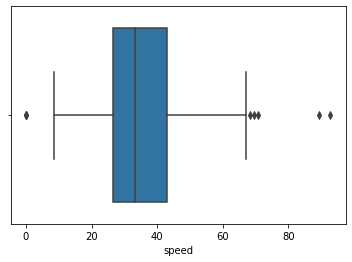

In [11]:
# Boxplot 
sns.boxplot(x=rr_2016['speed'])

# Initial rows of rr_2016 dataframe
rr_2016.shape

### (rr_2016) Calculation of upper and lower bounds for values of speed 

In [12]:
# Calculating IQR
rr16_Q1 = rr_2016['speed'].quantile(0.25)
rr16_Q3 = rr_2016['speed'].quantile(0.75)
rr16_IQR = rr16_Q3 - rr16_Q1

# Calculating upper and lower bounds
rr16_lower_limit = rr16_Q1 - 1.5 * rr16_IQR
rr16_upper_limit = rr16_Q3 + 1.5 * rr16_IQR
print("Lower bound for speed at rr_2016: ", rr16_lower_limit.round(), "km/h")
print("Upper bound for speed at rr_2016: ", rr16_upper_limit.round(), "km/h")

Lower bound for speed at rr_2016:  2.0 km/h
Upper bound for speed at rr_2016:  67.0 km/h


### (rr_2016) Remove outliers and move to new dataframe

In [13]:
# Remove outliers - upper boundary
outliers_removed_rr_2016 = rr_2016[rr_2016['speed'] < rr16_upper_limit]

### (rr_2016) Visually check if outliers are removed

(2817, 11)

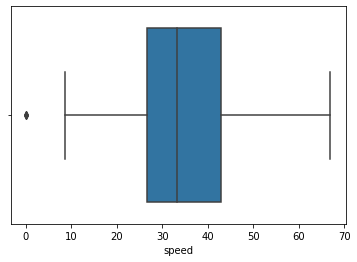

In [14]:
# Boxplot
sns.boxplot(x=outliers_removed_rr_2016['speed'])

# Check removed outliers difference
outliers_removed_rr_2016.shape

### (tt_2016) Visually check if there are outliers that should be considered to remove for speed column and initial number of rows

(1541, 11)

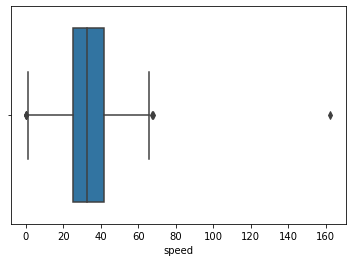

In [15]:
#Boxplot 
sns.boxplot(x=tt_2016['speed'])

# Initial rows of tt_2016 dataframe
tt_2016.shape

### (tt_2016) Calculation of upper and lower bounds for values of speed 

In [16]:
# Calculating IQR
tt16_Q1 = tt_2016['speed'].quantile(0.25)
tt16_Q3 = tt_2016['speed'].quantile(0.75)
tt16_IQR = tt16_Q3 - tt16_Q1

# Calculating upper and lower bounds
tt16_lower_limit = tt16_Q1 - 1.5 * tt16_IQR
tt16_upper_limit = tt16_Q3 + 1.5 * tt16_IQR

### (tt_2016) Remove outliers and move to new dataframe

In [17]:
# Remove outliers - upper boundary
outliers_removed_tt_2016 = tt_2016[tt_2016['speed'] < tt16_upper_limit]

### (tt_2016) Visually check if outliers are removed

(1538, 11)

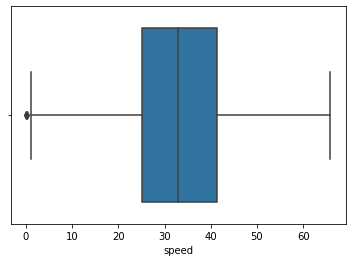

In [18]:
# Boxplot
sns.boxplot(x=outliers_removed_tt_2016['speed'])

# Check removed outliers difference
outliers_removed_tt_2016.shape

### (rr_2019) Visually check if there are outliers that should be considered to remove for speed column and initial number of rows

<AxesSubplot:xlabel='speed'>

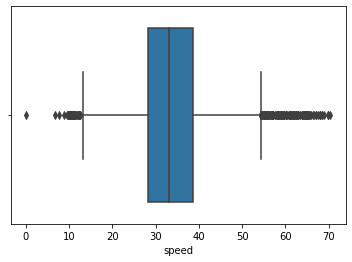

In [19]:
#Boxplot 
sns.boxplot(x=rr_2019['speed'])

The data for speed column in **rr_2019** does not necessarily need to remove outliers as recorded speed results are consistent throughout the race making the data reliable. It decreases the probability of an error in the recordings of speed throughout the race.

### (tt_2019) Visually check if there are outliers that should be considered to remove for speed column and initial number of rows

<AxesSubplot:xlabel='speed'>

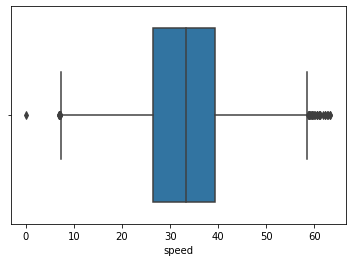

In [20]:
#Boxplot 
sns.boxplot(x=tt_2019['speed'])

The data for speed column in **tt_2019** does not necessarily need to remove outliers as recorded speed results are consistent throughout the race making the data reliable. It decreases the probability of an error in the recordings of speed throughout the race.

In [21]:
# Range of speed from min and max values of speed
print("Range of speed for rr_2016:", "(", outliers_removed_rr_2016['speed'].min(), "~", round(outliers_removed_rr_2016['speed'].max()), ")", "km/h")
print("Range of speed for tt_2016:", "(", outliers_removed_tt_2016['speed'].min(), "~", round(outliers_removed_tt_2016['speed'].max()), ")", "km/h")
print("Range of speed for rr_2019:", "(", rr_2019['speed'].min(), "~", round(rr_2019['speed'].max()), ")", "km/h")
print("Range of speed for tt_2019:", "(", tt_2019['speed'].min(), "~", round(tt_2019['speed'].max()), ")", "km/h")

Range of speed for rr_2016: ( 0.0 ~ 67 ) km/h
Range of speed for tt_2016: ( 0.0 ~ 66 ) km/h
Range of speed for rr_2019: ( 0.0 ~ 70 ) km/h
Range of speed for tt_2019: ( 0.0 ~ 63 ) km/h


# Analysis

The range of speed for each ride is observed by looking at the min and max values of speed. The min value would be the initial speed when the race starts which will always be zero, therefore we still incldue the "<i>outliers</i>" values that are lower than the lower boundaries (Q1 QUNATILE) of speed values. The valid max value would be capped around the upper bound (Q3 QUANTILE) and any values that are far above that will be considered outliers. Overall, if we have a look at the range of speeds of each race, both road races from 2016 and 2019 data show faster speed than the time trials. Therefore, we can make an assumption that road races have achieved better speed and is faster than time trials.

# Best and average speed achieved in time trials 

### Top speed achieved at 2016 and 2019 time trials

In [22]:
# Top speed calculation is max - min of speed value
tt_2016Speed = outliers_removed_tt_2016['speed'].max() - outliers_removed_tt_2016['speed'].min()
tt_2019Speed = tt_2019['speed'].max() - tt_2019['speed'].min()

print("Best speed achieved in tt_2016Speed:", round(tt_2016Speed), "km/h")
print("Best speed achieved in tt_2019Speed:", round(tt_2019Speed), "km/h")

Best speed achieved in tt_2016Speed: 66 km/h
Best speed achieved in tt_2019Speed: 63 km/h


### Average speed at 2016 and 2019 time trials

In [23]:
# Avergae speed calculation
tt_2016AvgSpeed = outliers_removed_tt_2016['speed'].mean()
tt_2019AvgSpeed = tt_2019['speed'].mean()

print("Average speed of tt_2016:", tt_2016AvgSpeed, "km/h")
print("Average speed of tt_2019:", tt_2019AvgSpeed, "km/h")

Average speed of tt_2016: 33.40195024636052 km/h
Average speed of tt_2019: 33.05782378815691 km/h


# Analysis

When comparing the two time trial races, the <b>top speed</b> was achieved in <b>2016 at 66km/h</b>. However, the <b>average speed</b> was recorded at <b>33km/h</b>, for both 2016 and 2019. If we look more in detail considering the decimals, the average speed in 2016 was faster by <b>0.35km/h</b> than in 2019. Since the records were very tight for the average speed of both time trial races, we use the raw result instead of rounding the decimals. Therefore, we can conclude that time trials in 2016 was faster due to higher top speed and better average speed.

# Average speed when rider is descending, flat and climbing

Generally, positive values indicate climbing, negative values indivate descending and zero value indicate flat that is recorded from the race. However, flat surfaces may have the slightest of elevation angles so it is appropriate to have a set boundary above and below the zero value that will also be included as <b><i>flat</i></b> values.

### Average speed of descending, flat and climbing for rr_2016

In [24]:
set(outliers_removed_rr_2016['elevation_gain'])

{-1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999773,
 -1.200000000000017,
 -1.1999999999999886,
 -1.0,
 -0.8000000000000114,
 -0.799999999999983,
 -0.7999999999999545,
 -0.6000000000000227,
 -0.5999999999999943,
 -0.5999999999999659,
 -0.4000000000000341,
 -0.4000000000000057,
 -0.39999999999997726,
 0.0,
 0.39999999999997726,
 0.4000000000000057,
 0.4000000000000341,
 0.5999999999999659,
 0.5999999999999943,
 0.6000000000000227,
 0.7999999999999545,
 0.799999999999983,
 0.8000000000000114,
 1.0,
 1.1999999999999886}

We have a look at elevation_gain values for rr_2016. Note that some values near 0 may also be considered <b><i>flat</i></b> in appropriate cases. Here, we will set a boundary for <b><i>flat</i></b> surface values at 0.5m below and above 0. Values that are less than -0.5 are considered descending, values between -0.5 and 0.5 inclusive are flat and values that are more than 0.5 is climbing.

In [25]:
# Descending speed
desc_rr_2016 = outliers_removed_rr_2016[outliers_removed_rr_2016['elevation_gain'] < -0.5]
print("rr_2016 -> Downhill average speed:", round(desc_rr_2016['speed'].mean()), "km/h")

# Descending speed
flat_rr_2016 = outliers_removed_rr_2016[(outliers_removed_rr_2016['elevation_gain'] >= -0.5) & (outliers_removed_rr_2016['elevation_gain'] <= 0.5)]
print("rr_2016 -> Flat average speed:", round(flat_rr_2016['speed'].mean()), "km/h")

# Climbing speed
climb_rr_2016 = outliers_removed_rr_2016[outliers_removed_rr_2016['elevation_gain'] > 0.5]
print("rr_2016 -> Uphill average speed:", round(climb_rr_2016['speed'].mean()), "km/h")

rr_2016 -> Downhill average speed: 50 km/h
rr_2016 -> Flat average speed: 33 km/h
rr_2016 -> Uphill average speed: 27 km/h


### Average speed of descending, flat and climbing for tt_2016

In [26]:
set(outliers_removed_tt_2016['elevation_gain'])

{-7.400000000000006,
 -1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999915,
 -1.200000000000017,
 -1.2000000000000028,
 -1.1999999999999886,
 -1.0,
 -0.8000000000000114,
 -0.7999999999999972,
 -0.799999999999983,
 -0.6000000000000227,
 -0.6000000000000085,
 -0.5999999999999943,
 -0.4000000000000057,
 -0.3999999999999915,
 -0.39999999999997726,
 -0.20000000000000284,
 0.0,
 0.20000000000000284,
 0.39999999999997726,
 0.3999999999999915,
 0.4000000000000057,
 0.5999999999999943,
 0.6000000000000085,
 0.6000000000000227,
 0.799999999999983,
 0.7999999999999972,
 0.8000000000000114,
 1.0,
 1.2000000000000028,
 2.3999999999999915}

We have a look at elevation_gain values for tt_2016. Note that there is an obvious <b><i>outlier</i></b> value at <b>-7.400000000000006</b>. We will remove the row with this elevation_gain value from the dataset for validity of anaylsis. Similarly, we will cap descending and climbing values at 0.5m. Values that are less than -0.5 are considered descending, values between -0.5 and 0.5 inclusive are flat and values that are more than 0.5 is climbing.

In [27]:
# Remove outlier
outliers_removed_2_tt_2016 = outliers_removed_tt_2016.copy()
outliers_removed_2_tt_2016.drop(outliers_removed_2_tt_2016[outliers_removed_2_tt_2016['elevation_gain'] < -5.0].index, inplace=True)
set(outliers_removed_2_tt_2016['elevation_gain'])

{-1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999915,
 -1.200000000000017,
 -1.2000000000000028,
 -1.1999999999999886,
 -1.0,
 -0.8000000000000114,
 -0.7999999999999972,
 -0.799999999999983,
 -0.6000000000000227,
 -0.6000000000000085,
 -0.5999999999999943,
 -0.4000000000000057,
 -0.3999999999999915,
 -0.39999999999997726,
 -0.20000000000000284,
 0.0,
 0.20000000000000284,
 0.39999999999997726,
 0.3999999999999915,
 0.4000000000000057,
 0.5999999999999943,
 0.6000000000000085,
 0.6000000000000227,
 0.799999999999983,
 0.7999999999999972,
 0.8000000000000114,
 1.0,
 1.2000000000000028,
 2.3999999999999915}

We check that the outlier value has been dropped.

In [28]:
# Descending speed
desc_tt_2016 = outliers_removed_tt_2016[outliers_removed_tt_2016['elevation_gain'] < -0.5]
print("tt_2016 -> Downhill average speed:", round(desc_tt_2016['speed'].mean()), "km/h")

# Flat speed
flat_tt_2016 = outliers_removed_tt_2016[(outliers_removed_tt_2016['elevation_gain'] >= -0.5) & (outliers_removed_tt_2016['elevation_gain'] <= 0.5)]
print("tt_2016 -> Flat average speed:", round(flat_tt_2016['speed'].mean()), "km/h")

# Climbing speed
climb_tt_2016 = outliers_removed_tt_2016[outliers_removed_tt_2016['elevation_gain'] > 0.5]
print("tt_2016 -> Uphill average speed:", round(climb_tt_2016['speed'].mean()), "km/h")

tt_2016 -> Downhill average speed: 47 km/h
tt_2016 -> Flat average speed: 31 km/h
tt_2016 -> Uphill average speed: 25 km/h


### Average speed of descending, flat and climbing for rr_2019

In [29]:
set(rr_2019['elevation_gain'])

{-2.0,
 -1.8000000000000114,
 -1.6000000000000227,
 -1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999773,
 -1.200000000000017,
 -1.1999999999999886,
 -1.0000000000000284,
 -1.0,
 -0.8000000000000114,
 -0.799999999999983,
 -0.7999999999999545,
 -0.6000000000000227,
 -0.5999999999999943,
 -0.5999999999999659,
 -0.4000000000000341,
 -0.4000000000000057,
 -0.39999999999997726,
 -0.20000000000004547,
 -0.20000000000001705,
 -0.19999999999998863,
 0.0,
 0.19999999999998863,
 0.20000000000001705,
 0.20000000000004547,
 0.39999999999997726,
 0.4000000000000057,
 0.4000000000000341,
 0.5999999999999659,
 0.5999999999999943,
 0.6000000000000227,
 0.799999999999983,
 0.8000000000000114,
 1.0}

We have a look at elevation_gain values for rr_2019. Note that some values near 0 may also be considered <b><i>flat</i></b> in appropriate cases. Here, we will set a boundary for <b><i>flat</i></b> surface values at 0.5m below and above 0. Values that are less than -0.5 are considered descending, values between -0.5 and 0.5 inclusive are flat and values that are more than 0.5 is climbing.

In [30]:
# Descending speed
desc_rr_2019 = rr_2019[rr_2019['elevation_gain'] < -0.5]
print("rr_2019 -> Downhill average speed:", round(desc_rr_2019['speed'].mean()), "km/h")

# Flat speed
flat_rr_2019 = rr_2019[(rr_2019['elevation_gain'] >= -0.5) & (rr_2019['elevation_gain'] <= 0.5)]
print("rr_2019 -> Flat average speed:", round(flat_rr_2019['speed'].mean()), "km/h")

# Climbing speed
climb_rr_2019 = rr_2019[rr_2019['elevation_gain'] > 0.5]
print("rr_2019 -> Uphill average speed:", round(climb_rr_2019['speed'].mean()), "km/h")

rr_2019 -> Downhill average speed: 50 km/h
rr_2019 -> Flat average speed: 33 km/h
rr_2019 -> Uphill average speed: 30 km/h


### Average speed of descending, flat and climbing for tt_2019

In [31]:
set(tt_2019['elevation_gain'])

{-1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999773,
 -1.200000000000017,
 -1.1999999999999886,
 -1.0,
 -0.8000000000000114,
 -0.799999999999983,
 -0.7999999999999545,
 -0.6000000000000227,
 -0.5999999999999943,
 -0.5999999999999659,
 -0.4000000000000341,
 -0.4000000000000057,
 -0.39999999999997726,
 -0.20000000000004547,
 -0.20000000000001705,
 -0.19999999999998863,
 0.0,
 0.19999999999998863,
 0.20000000000001705,
 0.20000000000004547,
 0.39999999999997726,
 0.4000000000000057,
 0.4000000000000341,
 0.5999999999999943,
 0.6000000000000227}

We have a look at elevation_gain values for tt_2019. Note that some values near 0 may also be considered <b><i>flat</i></b> in appropriate cases. Here, we will set a boundary for <b><i>flat</i></b> surface values at 0.5m below and above 0. Values that are less than -0.5 are considered descending, values between -0.5 and 0.5 inclusive are flat and values that are more than 0.5 is climbing.

In [32]:
# Descending speed
desc_tt_2019 = tt_2019[tt_2019['elevation_gain'] < -0.5]
print("tt_2019 -> Downhill average speed:", round(desc_tt_2019['speed'].mean()), "km/h")

# Flat speed
flat_tt_2019 = tt_2019[(tt_2019['elevation_gain'] >= -0.5) & (tt_2019['elevation_gain'] <= 0.5)]
print("tt_2019 -> Flat average speed:", round(flat_tt_2019['speed'].mean()), "km/h")

# Climbing speed
climb_tt_2019 = tt_2019[tt_2019['elevation_gain'] > 0.5]
print("tt_2019 -> Uphill average speed:", round(climb_tt_2019['speed'].mean()), "km/h")

tt_2019 -> Downhill average speed: 51 km/h
tt_2019 -> Flat average speed: 32 km/h
tt_2019 -> Uphill average speed: 29 km/h


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





# Development measures for each race

### Development - rr_2016

In [33]:
# Convert speed to metres/hr and cadence to rotations per hour
development_rr_2016 = (outliers_removed_rr_2016['speed']*1000)/(outliers_removed_rr_2016['cadence']*60)
print(development_rr_2016)

2016-05-14 04:02:41+00:00    0.000000
2016-05-14 04:02:42+00:00    4.907092
2016-05-14 04:02:46+00:00    6.822931
2016-05-14 04:02:49+00:00    6.437546
2016-05-14 04:02:51+00:00    6.393775
                               ...   
2016-05-14 05:29:16+00:00         inf
2016-05-14 05:29:17+00:00         inf
2016-05-14 05:29:18+00:00         inf
2016-05-14 05:29:19+00:00         inf
2016-05-14 05:29:21+00:00         inf
Length: 2817, dtype: float64


Calculation for development is to divide speed by cadence, however we need to convert these values so that we can do a meaningful calculation. As seen above, we get some <b><i>inf</i></b> values that we need to replace.

In [34]:
# Replace infinity values to NaN values so we can drop them 
development_rr_2016.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check inf values replaced by NaN
print(development_rr_2016)

# Initial rows of dataframe
print(development_rr_2016.shape)

2016-05-14 04:02:41+00:00    0.000000
2016-05-14 04:02:42+00:00    4.907092
2016-05-14 04:02:46+00:00    6.822931
2016-05-14 04:02:49+00:00    6.437546
2016-05-14 04:02:51+00:00    6.393775
                               ...   
2016-05-14 05:29:16+00:00         NaN
2016-05-14 05:29:17+00:00         NaN
2016-05-14 05:29:18+00:00         NaN
2016-05-14 05:29:19+00:00         NaN
2016-05-14 05:29:21+00:00         NaN
Length: 2817, dtype: float64
(2817,)


We replace the <b><i>inf</i></b> values with <b><i>NaN</i></b> values

In [35]:
# Drop NaN values from dataframe
development_rr_2016 = development_rr_2016.dropna()

# Rows after dropping NaN rows
development_rr_2016.shape

(2274,)

We then drop those NaN values from the dataframe. We check this by comparing udpated rows from initial rows.

In [36]:
# Check if NaN values have been dropped
print(development_rr_2016)

2016-05-14 04:02:41+00:00    0.000000
2016-05-14 04:02:42+00:00    4.907092
2016-05-14 04:02:46+00:00    6.822931
2016-05-14 04:02:49+00:00    6.437546
2016-05-14 04:02:51+00:00    6.393775
                               ...   
2016-05-14 05:28:40+00:00    7.663577
2016-05-14 05:28:44+00:00    8.032992
2016-05-14 05:28:45+00:00    7.798309
2016-05-14 05:28:54+00:00    8.278524
2016-05-14 05:28:56+00:00    7.884356
Length: 2274, dtype: float64


Check if NaN values have been removed.

In [37]:
set(development_rr_2016)

{0.0,
 2.8722282337808593,
 3.6884632229913805,
 4.1791104374588315,
 5.823765074843081,
 6.720691318819878,
 5.873877546162035,
 6.881714915578904,
 6.225867414132793,
 10.021351158159554,
 5.999481534480083,
 5.283328392040403,
 13.806586392291841,
 5.500728685217467,
 15.648860053885667,
 15.59238608117504,
 9.47334511347097,
 9.976672320293204,
 12.718043264164379,
 13.117016304354621,
 13.549729564402728,
 13.39832498974122,
 23.67078492813757,
 17.217611434408163,
 25.98435888714684,
 5.966129856939574,
 27.119044914829722,
 5.270904685041387,
 26.35117926979737,
 29.02855573473977,
 6.265151080696569,
 6.416748541147626,
 6.619581008700266,
 5.229830142339097,
 31.315263287499818,
 29.293174625856956,
 29.919123189089884,
 6.35005820586764,
 33.47143148959392,
 6.148916121991192,
 36.471876608299304,
 7.155956203959704,
 7.508560648860907,
 5.856710572445736,
 5.801494353237644,
 5.416420475164927,
 6.686003525322435,
 6.820574497885759,
 6.960443544861932,
 6.805596318062585,
 

As development values will normally range from <b><i>2m to 10m</i></b> as mentioned in the problem statement, we will check how the values vary.

In [38]:
# Drop rows that are outside the boundaries of 2m ~ 10m as they are considered as outliers 
development_rr_2016_clean = development_rr_2016.drop(development_rr_2016.index[(development_rr_2016 >= 10.0) | (development_rr_2016 <= 2.0)])

# Check if outliers have been dropped
set(development_rr_2016_clean)

{2.8722282337808593,
 3.6884632229913805,
 4.1791104374588315,
 5.823765074843081,
 6.720691318819878,
 5.873877546162035,
 6.881714915578904,
 6.225867414132793,
 8.145267854880178,
 5.21329508927403,
 4.537443419559224,
 6.730347120169569,
 5.999481534480083,
 6.624282885408604,
 7.362384740456179,
 9.47334511347097,
 9.976672320293204,
 5.283328392040403,
 5.966129856939574,
 5.270904685041387,
 5.229830142339097,
 5.852108887749068,
 6.265151080696569,
 6.416748541147626,
 6.619581008700266,
 5.854565982482882,
 5.021934499597478,
 6.35005820586764,
 6.148916121991192,
 7.155956203959704,
 6.558446580447708,
 6.97550744124635,
 7.508560648860907,
 5.856710572445736,
 5.801494353237644,
 5.416420475164927,
 6.686003525322435,
 6.820574497885759,
 6.960443544861932,
 6.805596318062585,
 5.925689440125952,
 6.734569059046239,
 6.049064351585061,
 6.4236149205218585,
 6.9586406252094,
 6.598265540156094,
 7.0770933104238924,
 7.502819766144571,
 6.099746922126828,
 7.046835380924167,
 

We drop the outliers that is less than 2m and greater than 10m.

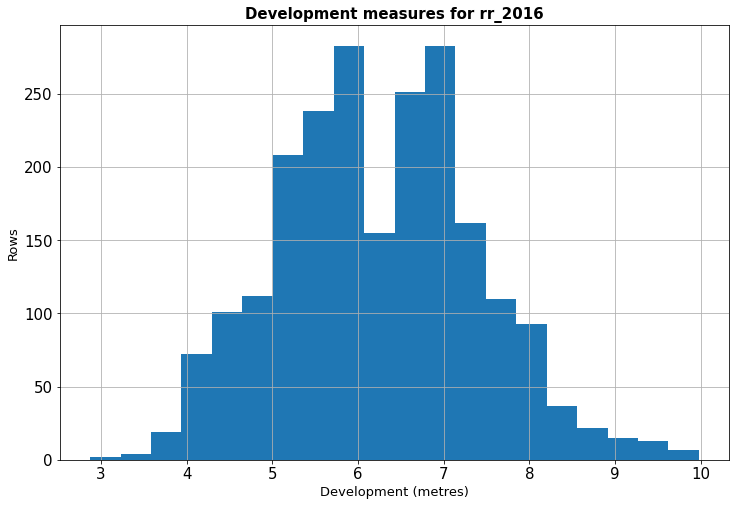

In [39]:
# Histogram plot
development_rr_2016_clean.plot(kind='hist',
        bins=20,
        grid=True,
        figsize=(12,8),
        fontsize=15)
plt.title('Development measures for rr_2016', fontsize=15, fontweight='bold')
plt.xlabel('Development (metres)', fontsize=13)
plt.ylabel("Rows", fontsize=13);

### rr_2016 Histogram Analysis

As seen from the histogram plot above, the development measures mostly record at 5m ~ 7m. The graph shows a pyramid like structure that indicates that rr_2016 has a good balance of uphill and downhill throughout the race. There is slightly more lower development measures than high development which indicates that there are slightly more uphill climbing in rr_2016. 

### Development - tt_2016

In [40]:
# Convert speed to metres/hr and cadence to rotations per hour
development_tt_2016 = (outliers_removed_tt_2016['speed']*1000)/(outliers_removed_tt_2016['cadence']*60)
print(development_tt_2016)

2016-07-02 23:05:30+00:00    0.000000
2016-07-02 23:05:32+00:00    3.186533
2016-07-02 23:05:38+00:00    0.284851
2016-07-02 23:06:01+00:00    0.071740
2016-07-02 23:06:02+00:00    1.472326
                               ...   
2016-07-02 23:50:39+00:00    7.496771
2016-07-02 23:50:41+00:00    7.388075
2016-07-02 23:50:45+00:00         inf
2016-07-02 23:51:16+00:00    8.714967
2016-07-02 23:51:17+00:00    3.905163
Length: 1538, dtype: float64


Calculation for development is to divide speed by cadence, however we need to convert these values so that we can do a meaningful calculation. As seen above, we get some <b><i>inf</i></b> values that we need to replace.

In [41]:
# Replace infinity values to NaN values so we can drop them 
development_tt_2016.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check inf values replaced by NaN
print(development_tt_2016)

# Initial rows of dataframe
print(development_tt_2016.shape)

2016-07-02 23:05:30+00:00    0.000000
2016-07-02 23:05:32+00:00    3.186533
2016-07-02 23:05:38+00:00    0.284851
2016-07-02 23:06:01+00:00    0.071740
2016-07-02 23:06:02+00:00    1.472326
                               ...   
2016-07-02 23:50:39+00:00    7.496771
2016-07-02 23:50:41+00:00    7.388075
2016-07-02 23:50:45+00:00         NaN
2016-07-02 23:51:16+00:00    8.714967
2016-07-02 23:51:17+00:00    3.905163
Length: 1538, dtype: float64
(1538,)


We replace the <b><i>inf</i></b> values with <b><i>NaN</i></b> values

In [42]:
# Drop NaN values from dataframe
development_tt_2016 = development_tt_2016.dropna()

# Rows after dropping NaN rows
development_tt_2016.shape

(1478,)

We then drop those NaN values from the dataframe. We check this by comparing udpated rows from initial rows.

In [43]:
# Check if NaN values have been dropped
print(development_tt_2016)

2016-07-02 23:05:30+00:00    0.000000
2016-07-02 23:05:32+00:00    3.186533
2016-07-02 23:05:38+00:00    0.284851
2016-07-02 23:06:01+00:00    0.071740
2016-07-02 23:06:02+00:00    1.472326
                               ...   
2016-07-02 23:50:37+00:00    7.416822
2016-07-02 23:50:39+00:00    7.496771
2016-07-02 23:50:41+00:00    7.388075
2016-07-02 23:51:16+00:00    8.714967
2016-07-02 23:51:17+00:00    3.905163
Length: 1478, dtype: float64


Check if NaN values have been removed.

In [44]:
set(development_tt_2016)

{0.0,
 2.7339113449240884,
 3.5270879280846863,
 4.913268871339341,
 4.679410843442383,
 6.677732090576502,
 4.45984371190093,
 4.217557580141516,
 9.106621921695158,
 10.061308589255233,
 5.773858153835192,
 5.968473218673097,
 13.248562699967867,
 14.09313744935448,
 15.72595980369692,
 7.559450172247239,
 8.421292362845463,
 9.705893782165987,
 11.457296650771085,
 12.647872051999585,
 25.8354731766965,
 5.573161176779081,
 5.924687790954863,
 28.634770982420047,
 27.597656172075503,
 5.753697841511553,
 6.828694367362004,
 32.64839415808723,
 31.661788653096636,
 6.765211868288361,
 30.5327371457024,
 32.00595874718793,
 6.7326420698045695,
 4.110324039719644,
 4.26238171883685,
 4.285216080566756,
 5.969470225843993,
 5.688780920228482,
 5.870097345607264,
 5.9874024266058266,
 6.850671894393003,
 6.097881523569726,
 6.964928817868185,
 7.359137019583586,
 7.949545143043992,
 7.940047142304338,
 7.865247568908985,
 4.467925345011794,
 5.124806737946246,
 5.75809352611674,
 5.03927

As development values will normally range from <b><i>2m to 10m</i></b> as mentioned in the problem statement, we will check how the values vary.

In [45]:
# Drop rows that are outside the boundaries of 2m ~ 10m as they are considered as outliers 
development_tt_2016_clean = development_tt_2016.drop(development_tt_2016.index[(development_tt_2016 >= 10.0) | (development_tt_2016 <= 2.0)])

# Check if outliers have been dropped
set(development_tt_2016_clean)

{2.7339113449240884,
 3.5270879280846863,
 4.913268871339341,
 4.679410843442383,
 4.45984371190093,
 4.217557580141516,
 4.612380938657026,
 9.106621921695158,
 9.206092462604722,
 5.773858153835192,
 5.968473218673097,
 5.573161176779081,
 5.7140628450115685,
 6.261373469153938,
 7.559450172247239,
 8.421292362845463,
 9.705893782165987,
 5.924687790954863,
 5.23489493902639,
 5.753697841511553,
 6.828694367362004,
 6.765211868288361,
 6.7326420698045695,
 4.110324039719644,
 4.26238171883685,
 4.285216080566756,
 5.969470225843993,
 5.688780920228482,
 5.870097345607264,
 5.9874024266058266,
 6.850671894393003,
 6.097881523569726,
 6.964928817868185,
 7.359137019583586,
 7.949545143043992,
 7.940047142304338,
 7.865247568908985,
 4.467925345011794,
 5.124806737946246,
 5.75809352611674,
 5.0392761897930445,
 5.795427999447783,
 6.034654345708249,
 6.134645673720401,
 7.0127390161688385,
 8.273383604889036,
 8.16101045603108,
 8.252056182869355,
 4.807350767333705,
 4.7330279494569,


We drop the outliers that is less than 2m and greater than 10m.

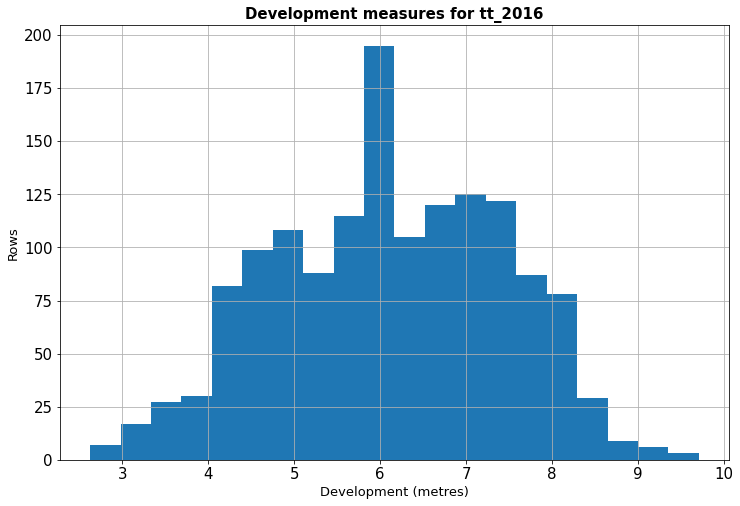

In [46]:
# Histogram plot
development_tt_2016_clean.plot(kind='hist',
        bins=20,
        grid=True,
        figsize=(12,8),
        fontsize=15)
plt.title('Development measures for tt_2016', fontsize=15, fontweight='bold')
plt.xlabel('Development (metres)', fontsize=13)
plt.ylabel("Rows", fontsize=13);

### tt_2016 Histogram Analysis

As seen from the histogram plot above, the development measures mostly record at 4m ~ 8m. The graph is a little similar to rr_2016 in that it skews upwards in the middle. Similarly, this would indicate that tt_2016 has a good balance of uphill and downhill throughout the race.

### Development - rr_2019

In [47]:
# Convert speed to metres/hr and cadence to rotations per hour
development_rr_2019 = (rr_2019['speed']*1000)/(rr_2019['cadence']*60)
print(development_rr_2019)

2019-06-22 22:33:45+00:00     0.000000
2019-06-22 22:33:46+00:00     4.839850
2019-06-22 22:33:47+00:00     5.936409
2019-06-22 22:33:48+00:00     6.491233
2019-06-22 22:33:49+00:00     6.512249
                               ...    
2019-06-23 00:05:23+00:00    26.656700
2019-06-23 00:05:24+00:00    60.459565
2019-06-23 00:05:25+00:00          inf
2019-06-23 00:05:26+00:00          inf
2019-06-23 00:05:27+00:00          inf
Length: 5503, dtype: float64


Calculation for development is to divide speed by cadence, however we need to convert these values so that we can do a meaningful calculation. As seen above, we get some <b><i>inf</i></b> values that we need to replace.

In [48]:
# Replace infinity values to NaN values so we can drop them 
development_rr_2019.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check inf values replaced by NaN
print(development_rr_2019)

# Initial rows of dataframe
print(development_rr_2019.shape)

2019-06-22 22:33:45+00:00     0.000000
2019-06-22 22:33:46+00:00     4.839850
2019-06-22 22:33:47+00:00     5.936409
2019-06-22 22:33:48+00:00     6.491233
2019-06-22 22:33:49+00:00     6.512249
                               ...    
2019-06-23 00:05:23+00:00    26.656700
2019-06-23 00:05:24+00:00    60.459565
2019-06-23 00:05:25+00:00          NaN
2019-06-23 00:05:26+00:00          NaN
2019-06-23 00:05:27+00:00          NaN
Length: 5503, dtype: float64
(5503,)


We replace the <b><i>inf</i></b> values with <b><i>NaN</i></b> values

In [49]:
# Drop NaN values from dataframe
development_rr_2019 = development_rr_2019.dropna()

# Rows after dropping NaN rows
development_rr_2019.shape

(4971,)

We then drop those NaN values from the dataframe. We check this by comparing udpated rows from initial rows.

In [50]:
# Check if NaN values have been dropped
print(development_rr_2019)

2019-06-22 22:33:45+00:00     0.000000
2019-06-22 22:33:46+00:00     4.839850
2019-06-22 22:33:47+00:00     5.936409
2019-06-22 22:33:48+00:00     6.491233
2019-06-22 22:33:49+00:00     6.512249
                               ...    
2019-06-23 00:05:20+00:00     7.271756
2019-06-23 00:05:21+00:00    11.563761
2019-06-23 00:05:22+00:00    17.194246
2019-06-23 00:05:23+00:00    26.656700
2019-06-23 00:05:24+00:00    60.459565
Length: 4971, dtype: float64


Check if NaN values have been removed.

In [51]:
set(development_rr_2019)

{0.0,
 3.789840422145531,
 4.299136534912009,
 5.815300091967629,
 6.433807061920163,
 6.456830732859515,
 6.393423674729291,
 7.881199060363031,
 7.567665585523514,
 8.300241199623144,
 12.683992466620595,
 13.720960853838832,
 9.334402711327527,
 15.072224940896191,
 8.34654067633312,
 17.050299836007696,
 17.315763473854304,
 16.802181582222943,
 19.823390387273207,
 20.916611510553594,
 13.837786067321431,
 15.337236660221052,
 15.92605919123993,
 25.930467875508512,
 25.738767753237767,
 19.783782851668448,
 28.389990996577865,
 21.209119582583085,
 30.402422601964986,
 26.95601844293347,
 26.776184455039612,
 33.473622415896,
 34.5161039796824,
 35.80667293525272,
 7.2672501942070085,
 34.49183329856784,
 31.52028102340654,
 6.856288261785721,
 33.05429147307784,
 8.311750653171202,
 42.4678866282343,
 41.93186231474806,
 41.31661660745965,
 43.938253107012486,
 9.657073987704734,
 47.08341124120541,
 47.006941682299185,
 40.17647228481141,
 50.67840022004259,
 51.4641039177511,


As development values will normally range from <b><i>2m to 10m</i></b> as mentioned in the problem statement, we will check how the values vary.

In [52]:
# Drop rows that are outside the boundaries of 2m ~ 10m as they are considered as outliers 
development_rr_2019_clean = development_rr_2019.drop(development_rr_2019.index[(development_rr_2019 >= 10.0) | (development_rr_2019 <= 2.0)])

# Check if outliers have been dropped
set(development_rr_2019_clean)

{3.800440889430572,
 4.524815125165617,
 4.237438913224906,
 6.512248794571001,
 6.687840735483913,
 4.299135772335404,
 9.329252733365884,
 9.120170777669522,
 4.299136534912009,
 5.815300091967629,
 5.75169205964599,
 5.007204980914196,
 6.433807061920163,
 7.881199060363031,
 8.300241199623144,
 9.334402711327527,
 5.395554561856166,
 3.9466193034783146,
 4.685764172442418,
 4.90791400400326,
 4.951857088070483,
 7.99960824865492,
 4.9583609452195105,
 5.845572492568522,
 5.947667467357178,
 5.769640694004465,
 5.086660801279095,
 5.566328919993225,
 6.5446215576887425,
 6.47172852100482,
 6.817544891531838,
 6.856288261785721,
 6.773685231457648,
 7.567665585523514,
 7.287170874096887,
 7.2672501942070085,
 6.522830477539628,
 7.9424456433323485,
 8.34654067633312,
 8.311750653171202,
 8.329563648420844,
 7.27525260855964,
 6.396739342799897,
 9.657073987704734,
 7.958456252067544,
 8.522357473846341,
 6.888288728299598,
 5.475157272799406,
 6.824101984649121,
 7.006427507120443,
 

We drop the outliers that is less than 2m and greater than 10m.

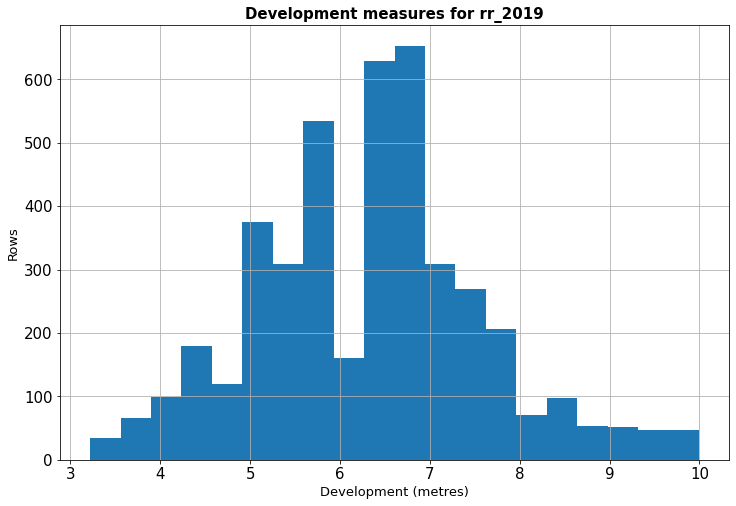

In [53]:
# Histogram plot
development_rr_2019_clean.plot(kind='hist',
        bins=20,
        grid=True,
        figsize=(12,8),
        fontsize=15)
plt.title('Development measures for rr_2019', fontsize=15, fontweight='bold')
plt.xlabel('Development (metres)', fontsize=13)
plt.ylabel("Rows", fontsize=13);

### rr_2019 Histogram Analysis

As seen from the histogram plot above, the development measures mostly record at 5m ~ 7m. The graph shows a steady climb in development measures from low to medium more than high development where it flattens out. This indicates the hilly nature of the rr_2019 course. 

### Development - tt_2019

In [54]:
# Convert speed to metres/hr and cadence to rotations per hour
development_tt_2019 = (tt_2019['speed']*1000)/(tt_2019['cadence']*60)
print(development_tt_2019)

2019-06-01 22:54:55+00:00         NaN
2019-06-01 22:54:56+00:00         inf
2019-06-01 22:54:57+00:00         inf
2019-06-01 22:54:58+00:00         inf
2019-06-01 22:54:59+00:00         inf
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Length: 2655, dtype: float64


Calculation for development is to divide speed by cadence, however we need to convert these values so that we can do a meaningful calculation. As seen above, we get some <b><i>inf</i></b> values that we need to replace.

In [55]:
# Replace infinity values to NaN values so we can drop them 
development_tt_2019.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check inf values replaced by NaN
print(development_tt_2019)

# Initial rows of dataframe
print(development_tt_2019.shape)

2019-06-01 22:54:55+00:00         NaN
2019-06-01 22:54:56+00:00         NaN
2019-06-01 22:54:57+00:00         NaN
2019-06-01 22:54:58+00:00         NaN
2019-06-01 22:54:59+00:00         NaN
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Length: 2655, dtype: float64
(2655,)


We replace the <b><i>inf</i></b> values with <b><i>NaN</i></b> values

In [56]:
# Drop NaN values from dataframe
development_tt_2019 = development_tt_2019.dropna()

# Rows after dropping NaN rows
development_tt_2019.shape

(2597,)

We then drop those NaN values from the dataframe. We check this by comparing udpated rows from initial rows.

In [57]:
# Check if NaN values have been dropped
print(development_tt_2019)

2019-06-01 22:55:04+00:00    23.585526
2019-06-01 22:55:05+00:00     5.453639
2019-06-01 22:55:06+00:00     2.225050
2019-06-01 22:55:07+00:00     5.461272
2019-06-01 22:55:08+00:00     5.253161
                               ...    
2019-06-01 23:39:05+00:00     7.320711
2019-06-01 23:39:06+00:00     7.262362
2019-06-01 23:39:07+00:00     7.254161
2019-06-01 23:39:08+00:00     7.313255
2019-06-01 23:39:09+00:00     9.878877
Length: 2597, dtype: float64


Check if NaN values have been removed.

In [58]:
set(development_tt_2019)

{2.978588734256782,
 3.9823291048090503,
 4.985534192560948,
 5.25316125762901,
 4.075961033528415,
 7.58793620143453,
 4.767123310581951,
 4.840497979929808,
 10.40241447645801,
 5.908388258947923,
 5.5213959457448425,
 5.6607022772533355,
 5.285946991148023,
 6.2222332056779805,
 7.959294194046976,
 17.158820653516173,
 11.359716704716767,
 19.110754152662196,
 15.762527776297187,
 4.679371979296775,
 18.334036938530726,
 23.58552596988126,
 23.609334048537473,
 23.88563897482028,
 26.196743242803322,
 27.41198132665718,
 5.708342215837888,
 25.17284494662711,
 29.871994884521907,
 6.431881981812126,
 32.101692637281744,
 6.402746393843472,
 6.579367249074494,
 28.515993953628524,
 36.66471876688674,
 6.279658500888445,
 7.120509747495134,
 6.463433112478356,
 40.884256573746114,
 41.24001838043462,
 8.315118806333658,
 46.40787244410246,
 5.122463891673246,
 66.73657921490118,
 5.683517708247394,
 72.03543539384256,
 2.92917974063866,
 77.75066218034617,
 4.5437829128157725,
 4.4735

As development values will normally range from <b><i>2m to 10m</i></b> as mentioned in the problem statement, we will check how the values vary.

In [59]:
# Drop rows that are outside the boundaries of 2m ~ 10m as they are considered as outliers 
development_tt_2019_clean = development_tt_2019.drop(development_tt_2019.index[(development_tt_2019 >= 10.0) | (development_tt_2019 <= 2.0)])

# Check if outliers have been dropped
set(development_tt_2019_clean)

{2.978588734256782,
 3.9823291048090503,
 3.5071444422644333,
 5.790111410673429,
 5.25316125762901,
 4.985534192560948,
 4.075961033528415,
 4.767123310581951,
 4.840497979929808,
 4.000314208326188,
 5.908388258947923,
 5.5213959457448425,
 5.6607022772533355,
 6.2222332056779805,
 7.58793620143453,
 8.84067705518818,
 9.011100200105204,
 4.679371979296775,
 5.708342215837888,
 5.698314098392984,
 6.431881981812126,
 6.402746393843472,
 6.579367249074494,
 6.279658500888445,
 6.463433112478356,
 7.120509747495134,
 6.586676283526458,
 8.315118806333658,
 5.122463891673246,
 5.683517708247394,
 2.92917974063866,
 4.5437829128157725,
 4.473517145270962,
 4.870207295387986,
 4.81797447833148,
 5.287570715206102,
 5.262586951036696,
 5.195196583754837,
 5.798560210835803,
 5.8154278014440886,
 6.853745095097993,
 6.524716482727258,
 6.549182483900922,
 7.301676021915314,
 7.2503027333822,
 7.428714801482415,
 7.24443483493505,
 3.071725795659533,
 5.861625606055189,
 3.0274058470535596,


We drop the outliers that is less than 2m and greater than 10m.

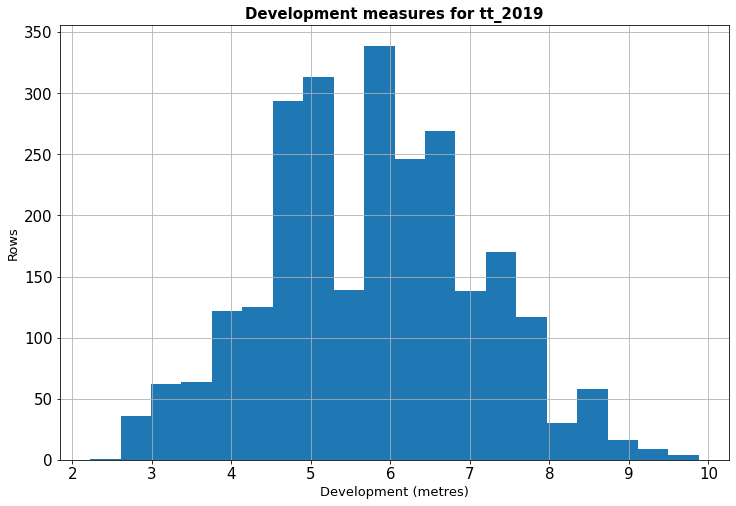

In [60]:
# Histogram plot
development_tt_2019_clean.plot(kind='hist',
        bins=20,
        grid=True,
        figsize=(12,8),
        fontsize=15)
plt.title('Development measures for tt_2019', fontsize=15, fontweight='bold')
plt.xlabel('Development (metres)', fontsize=13)
plt.ylabel("Rows", fontsize=13);

### tt_2019 Histogram Analysis

As seen from the histogram plot above, the development measures mostly record at 4m ~ 7m. The graph shows a alot of climbing and uphill gear used in the race. There are only a small amount of high development measurements when compared to the whole dataframe of tt_2019 development. This indicates the race course was mostly flat and uphill natured. 